<a href="https://colab.research.google.com/github/tomvangasse/game-store-manager/blob/main/tomsMenuProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
'''
Upload files here
Click run and then click choose files:

    Video_Game_Info.txt
    Board_Game_Info.txt
    Subscription_Info.txt
    Game_feedback.txt
    Booking.txt
    Rental.txt
    feedbackManager.pyc
    subscriptionManager.pyc
'''


from google.colab import files
uploaded = files.upload()

Saving Game_Feedback.txt to Game_Feedback (1).txt


Test

In [66]:
# import ipywidgets as widgets
# from ipywidgets import Layout
# from IPython.display import clear_output


# dateWidget = widgets.DatePicker(
#     description='Pick a Date',
#     disabled=False
# )

# textbox = widgets.Text(
#     value='',
#     placeholder='Type something',
#     description='String:',
#     disabled=False
# )

# button = widgets.Button(description="Submit")
# output = widgets.Output()



# def on_button_clicked(b):
#     with output:
#         clear_output()
#         button.layout.visibility = 'hidden'
#         print(dateWidget.value)
#         print(textbox.value)

# button.on_click(on_button_clicked)
# display(dateWidget)
# display(textbox)
# display(button, output)

import feedbackManager as fmTV
import subscriptionManager as smTV

print(fmTV.load_feedback())


subscriptions = smTV.load_subscriptions()
print(subscriptions)
for item in subscriptions:
    if item == "tomm":
        data = subscriptions[item]
        print(data["SubscriptionType"])
        break


[{'GameID': 'mine01v', 'Rating': 5, 'Comments': 'GOOD GAME'}, {'GameID': 'mine01v', 'Rating': 5, 'Comments': 'GOOD GAME'}, {'GameID': 'mine01v', 'Rating': 5, 'Comments': 'really good'}, {'GameID': 'mine01v', 'Rating': 4, 'Comments': 'not bad, i kept dying though'}, {'GameID': 'mine01v', 'Rating': 1, 'Comments': 'not a good game'}, {'GameID': 'mine01v', 'Rating': 5, 'Comments': 'perfect game'}]
{'abcd': {'SubscriptionType': 'basic', 'StartDate': datetime.datetime(2025, 10, 10, 0, 0), 'EndDate': datetime.datetime(2030, 10, 10, 0, 0)}, 'tomv': {'SubscriptionType': 'Basic', 'StartDate': datetime.datetime(2025, 12, 17, 0, 0), 'EndDate': datetime.datetime(2028, 12, 17, 0, 0)}, 'test': {'SubscriptionType': 'Basic', 'StartDate': datetime.datetime(2025, 1, 1, 0, 0), 'EndDate': datetime.datetime(2030, 1, 1, 0, 0)}, 'tomm': {'SubscriptionType': 'Premium', 'StartDate': datetime.datetime(2025, 1, 1, 0, 0), 'EndDate': datetime.datetime(2030, 1, 1, 0, 0)}, 'tomc': {'SubscriptionType': 'Basic', 'Start

Register / login

In [48]:
import ipywidgets as widgets
import subscriptionManager as smTV
import datetime
from dateutil.relativedelta import relativedelta as rd


def checkSubscription(userID):
    import subscriptionManager as smTV
    subscriptions = smTV.load_subscriptions()
    if smTV.check_subscription(userID, subscriptions):
        return True
    else:
        return False

def getSubscriptionType(userID):
    subscriptions = smTV.load_subscriptions()
    for item in subscriptions:
        if item == userID:
            data = subscriptions[item]
            return data["SubscriptionType"]
    return None

def register(userID, subscriptionType):


    subscriptions = smTV.load_subscriptions()

    if smTV.check_subscription(userID, subscriptions):
        with output:
            clear_output()
            print(f"{userID} is already registered")
        return

    if checkUserLength(userID) == False:
        with output:
            clear_output()
            print("Invalid user ID, must be 4 characters long")
        return


    date = datetime.datetime.now()
    startTime = date.strftime("%Y-%m-%d")
    endTime = (date + rd(years=3)).strftime("%Y-%m-%d")

    with open("Subscription_Info.txt", mode = "a") as file:
        file.write(f"\n{userID},{subscriptionType},{startTime},{endTime}")

    with output:
        clear_output()
        print(f"{userID} has been registered")
    return

def checkUserLength(userID):
    if len(userID) != 4:
        return False
    else:
        return True

Game search

In [15]:
import csv


output = widgets.Output()


def getVideoDict():
    with open("Video_Game_Info.txt", mode="r", newline="") as file:
        reader = csv.DictReader(file)
        videoGameDict = {row["GameID"]: row for row in reader}
        for GameID in videoGameDict:
            gameData = videoGameDict[GameID]
            available = int(gameData["Available copies"])
            unavailable = int(gameData["Unavailable copies"])
            gameData["Available copies"] = str(available + unavailable)
            gameData["Unavailable copies"] = "0"

    with open("Rental.txt", mode="r", newline="") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["GameID"] in videoGameDict and row["Return date"] == "":
                videoGameDict[row["GameID"]]["Available copies"] = str(int(videoGameDict[row["GameID"]]["Available copies"]) - 1)
                videoGameDict[row["GameID"]]["Unavailable copies"] = str(int(videoGameDict[row["GameID"]]["Unavailable copies"]) + 1)

    updateVideo(videoGameDict)
    return videoGameDict

def getBoardDict():
    with open("Board_Game_Info.txt", mode="r", newline="") as file:
        reader = csv.DictReader(file)
        boardGameDict = {row["GameID"]: row for row in reader}
        for GameID in boardGameDict:
            gameData = boardGameDict[GameID]
            available = int(gameData["Available copies"])
            unavailable = int(gameData["Unavailable copies"])
            gameData["Available copies"] = str(available + unavailable)
            gameData["Unavailable copies"] = "0"

    with open("Rental.txt", mode="r", newline="") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row["GameID"] in boardGameDict and row["Return date"] == "":
                boardGameDict[row["GameID"]]["Available copies"] = str(int(boardGameDict[row["GameID"]]["Available copies"]) - 1)
                boardGameDict[row["GameID"]]["Unavailable copies"] = str(int(boardGameDict[row["GameID"]]["Unavailable copies"]) + 1)

    updateBoard(boardGameDict)
    return boardGameDict



def printGames(platform, genre):
    videoDict = getVideoDict()
    boardDict = getBoardDict()
    with output:
        clear_output()
        print(f"Game ID: Game name:                Type:             Available / Unavailable:\n")
        if platform == "All" and genre == "All":
            for i in boardDict:
                currentGame = boardDict[i]
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Board game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
            for i in videoDict:
                currentGame = videoDict[i]
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Video game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")

        for i in boardDict:
            currentGame = boardDict[i]
            if platform == "All" and genre in boardDict[i]["Genre"]:
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Board game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
        for i in videoDict:
            currentGame = videoDict[i]
            if platform in currentGame["Platform"] and genre in videoDict[i]["Genre"]:
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Video game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
            elif platform == "All" and genre in currentGame["Genre"]:
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Video game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
            elif platform in currentGame["Platform"] and genre == "All":
                print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Video game     {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")

def printGameAvailability(GameID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()
    if GameID == "":
        return
    if GameID in boardDict:
        currentGame = boardDict[GameID]
        print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Available / Unavailable: {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
    elif GameID in videoDict:
        currentGame = videoDict[GameID]
        print(f"{currentGame["GameID"]}: {(currentGame["Game name"]): <25} Available / Unavailable: {currentGame["Available copies"]} / {currentGame["Unavailable copies"]}")
    else:
        return


def printGameInfo(GameID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()

    GameID = GameID.lower()
    if GameID == "":
        return
    if GameID not in boardDict and GameID not in videoDict:
        for key, value in boardDict.items():
            if GameID in value["Game name"].lower():
                GameID = key
                break
        for key, value in videoDict.items():
            if GameID in value["Game name"].lower():
                GameID = key
                break
    with output:
        clear_output()
        if GameID in boardDict:
            gameInfo = boardDict[GameID]
            for key, value in gameInfo.items():
                print(f"{key: >20}:  {value}")
            print("\n")
        elif GameID in videoDict:
            gameInfo = videoDict[GameID]
            for key, value in gameInfo.items():
                print(f"{key: >20}:  {value}")
            print("\n")
        else:
            return





Update text files:

In [16]:
def updateVideo(videoDict):
    headers = ["GameID", "Game name", "Platform", "Genre", "Date added", "Available copies", "Unavailable copies"]
    writer = csv.DictWriter(open("Video_Game_Info.txt", mode="w", newline=""), fieldnames=headers)
    writer.writeheader()
    for key, value in videoDict.items():
        writer.writerow(value)
    return

def updateBoard(boardDict):
    headers = ["GameID", "Game name", "No of players", "Genre", "Date added", "Available copies", "Unavailable copies"]
    writer = csv.DictWriter(open("Board_Game_Info.txt", mode="w", newline=""), fieldnames=headers)
    writer.writeheader()
    for key, value in boardDict.items():
        writer.writerow(value)
    return

def updateRental(rentalList):
    with open("Rental.txt", mode="w", newline="") as file:
        file.write("Rental userID,GameID,Rental date,Return date\n")
        for row in rentalList:
            file.write(f"{','.join(row)}\n")
    return



Game rent

In [50]:
import subscriptionManager as smTV
import feedbackManager as fmTV
from dateutil.relativedelta import relativedelta as rd
import datetime


def updateBoardFromRentals(GameID, action):
    value = 0
    if action == "rent":
        value = 1
    elif action == "return":
        value = -1
    else:
        return

    boardDict = getBoardDict()
    availableCopies = boardDict[GameID]["Available copies"]
    unavailableCopies = boardDict[GameID]["Unavailable copies"]
    boardDict[GameID]["Available copies"] = str(int(availableCopies) - value)
    boardDict[GameID]["Unavailable copies"] = str(int(unavailableCopies) + value)
    updateBoard(boardDict)

def updateVideoFromRentals(GameID, action):
    value = 0
    if action == "rent":
        value = 1
    elif action == "return":
        value = -1
    else:
        return

    videoDict = getVideoDict()
    availableCopies = videoDict[GameID]["Available copies"]
    unavailableCopies = videoDict[GameID]["Unavailable copies"]
    videoDict[GameID]["Available copies"] = str(int(availableCopies) - value)
    videoDict[GameID]["Unavailable copies"] = str(int(unavailableCopies) + value)
    updateVideo(videoDict)

def updateRentGame(gameID, userID):
    date = datetime.datetime.now()
    startTime = date.strftime("%Y-%m-%d")
    with open("Rental.txt", mode="a", newline="") as file:
        file.write(f"\n{userID},{gameID},{startTime},")


def checkAvailability(gameID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()
    if gameID in boardDict:
        currentGame = boardDict[gameID]
        if currentGame["Available copies"] == "0":
            return False
        else:
            return True

    elif gameID in videoDict:
        currentGame = videoDict[gameID]
        if currentGame["Available copies"] == "0":
            return False
        else:
            return True
    else:
        return None


def rentGameMain(gameID, userID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()
    if not checkRentalLimit(userID):
        limit = smTV.get_rental_limit(getSubscriptionType(userID))
        with output:
            clear_output()
            print(f"Cannot rent game - User has reached their rental limit of {limit}")
        return
    if gameID in videoDict:
        updateVideoFromRentals(gameID, "rent")
        updateRentGame(gameID, userID)
        currentGame = videoDict[gameID]
        with output:
            print(f"{userID} has successfully rented {currentGame['Game name']}")
    elif gameID in boardDict:
        updateBoardFromRentals(gameID, "rent")
        updateRentGame(gameID, userID)
        currentGame = boardDict[gameID]
        with output:
            print(f"{userID} has successfully rented {currentGame['Game name']}")

# Check rental limit

def checkRentalLimit(userID):
    limit = 0

    subType = getSubscriptionType(userID)
    if subType == "Basic":
        limit = 2
    elif subType == "Premium":
        limit = 7
    else:
        return None

    rentalList = getRentalList()
    userRentals = getUserRental(userID, rentalList)
    if len(userRentals) >= limit:
        return False
    else:
        return True


Returns


In [22]:
import datetime
import feedbackManager as fmTV


def getRentalList():
    with open("Rental.txt", mode="r", newline="") as file:
        count = 0
        rentalList = []
        for line in file:
            if count == 0:
                count += 1
                continue
            else:
                currentLine = line.rstrip().split(",")
            count += 1
            rentalList.append(currentLine)
    return rentalList

def getUserRental(userID, rentalList):
    userRentals = []
    for row in rentalList:
        if row[0] == userID and row[3] == "":
            userRentals.append(row)
    return userRentals

def printRentedGames(userID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()

    date = datetime.datetime.now()
    rentalList = getRentalList()

    if userID == False:
        return
    if checkSubscription(userID) == False:
        with output:
            clear_output()
            print("User not registered")
            return

    userRental = getUserRental(userID, rentalList)
    if len(userRental) == 0:
        with output:
            print("No rented games")
        return
    with output:
        print("Rented games:")
    videoDict = getVideoDict()
    boardDict = getBoardDict()
    for row in userRental:
        gameID = row[1]
        with output:
            if gameID in videoDict:
                print(f"{gameID}:  {videoDict[gameID]['Game name']}")
            elif gameID in boardDict:
                print(f"{gameID}:  {boardDict[gameID]['Game name']}")


def updateReturnList(rentalList, userID, gameID):
    for row in rentalList:
        if row[0] == userID and row[1] == gameID and row[3] == '':
            row[3] = datetime.datetime.now().strftime("%Y-%m-%d")
            break
    return rentalList


def returnGame(userID, gameID):
    videoDict = getVideoDict()
    boardDict = getBoardDict()

    rentalList = getRentalList()

    if gameID in videoDict:
        rentalList = updateReturnList(rentalList, userID, gameID)
        updateVideoFromRentals(gameID, "return")
        updateRental(rentalList)
        with output:
            print(f"{userID} has successfully returned {videoDict[gameID]['Game name']}")
            return True
    elif gameID in boardDict:
        rentalList = updateReturnList(rentalList, userID, gameID)
        updateBoardFromRentals(gameID, "return")
        updateRental(rentalList)
        with output:
            print(f"{userID} has successfully returned {boardDict[gameID]['Game name']}")
            return True
    else:
        with output:
            print("Invalid gameID")
        return False


# Feedback

def feedback(gameID, rating, comment):
    fmTV.add_feedback(gameID, rating, comment, "Game_Feedback.txt")
    return

def updateFeedback():
    headers = ["GameID", "Rating", "Comments"]
    writer = csv.DictWriter(open("Game_Feedback.txt", mode="w", newline=""), fieldnames=headers)
    writer.writeheader()
    for row in feedbackList:
        writer.writerow(row)
    return



Booking

In [23]:
def getBookingList():
    with open("Booking.txt", mode="r", newline="") as file:
        count = 0
        bookingList = []
        for line in file:
            if count == 0:
                count += 1
                continue
            else:
                currentLine = line.rstrip().split(",")
            count += 1
            bookingList.append(currentLine)
    return bookingList

def updateBooking(userID, date, time, guests):
    with open("Booking.txt", mode="a", newline="") as file:
        file.write(f"\n{userID},{date},{time},{guests}")
    return

def getBookedPeople(selectedDate, time, bookingList):
    bookedPeople = 0
    for row in bookingList:
        if row[1] == selectedDate.strftime("%Y-%m-%d") and row[2] == time:
            bookedPeople = bookedPeople + int(row[3]) + 1
    return bookedPeople


def bookingMain(userID, selectedDate, time, guests):
    bookingList = getBookingList()
    today = datetime.date.today()
    bookedPeople = getBookedPeople(selectedDate, time, bookingList)

    if bookedPeople + int(guests) + 1 > 50:
        with output:
            print("Not enough space in the selected timeslot")
            print(f"{bookedPeople} people have already booked this slot, 50 is the maximum we can hold")
        return
    if selectedDate < today:
        with output:
            print("Invalid date")
        return
    for item in bookingList:
        if item[0] == userID and item[1] == selectedDate and item[2] == time:
            with output:
                print("Timeslot already booked")
            return

    updateBooking(userID, selectedDate, time, guests)
    with output:
        print(f"Booking confirmed for {userID} on {selectedDate}")


Pruning and graphs

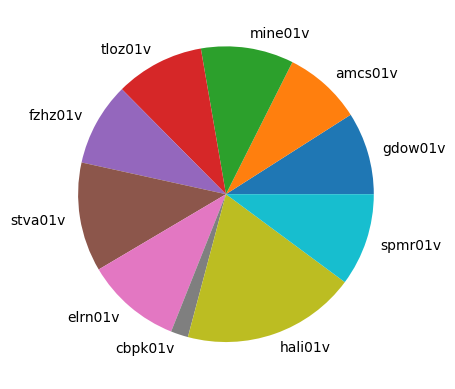

In [77]:
from typing_extensions import final
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# headers = ["GameID", "Rating", "Comments"]
# writer = csv.DictWriter(open("Game_Feedback.txt", mode="w", newline=""), fieldnames=headers)
# writer.writeheader()


# def getBoardFeedbackYaxis():
#     boardFeedbackArray = []
#     boardDict = getBoardDict()
#     feedback = fmTV.load_feedback()
#     for item in feedback:
#         if item["GameID"] in boardDict:
#             boardFeedbackArray.append(item["Rating"])
#     return boardFeedbackArray

def getVideoFeedbackList():
    videoDict = getVideoDict()
    feedback = fmTV.load_feedback()
    if feedback == []:
        return [[], []]

    gameRatings = {}
    for item in feedback:
        gameID = item["GameID"]
        if gameID in videoDict:
            if gameID not in gameRatings:
                gameRatings[gameID] = []
            gameRatings[gameID].append(item["Rating"])

    xAxis = []
    yAxis = []
    for gameID, ratingsList in gameRatings.items():
        if ratingsList:
            averageRating = sum(ratingsList) / len(ratingsList)
            xAxis.append(gameID)
            yAxis.append(averageRating)

    return [xAxis, yAxis]

# def plotBoardGraph():
#     plt.bar(np.array(getBoardFeedbackYaxis()))
#     with output:
#         plt.show()

def plotVideoGraph():
    x, y = getVideoFeedbackList()
    plt.pie(np.array(y), labels=x)

    plt.show()

plotVideoGraph()

## Main

In [49]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import clear_output


def resetValues():
    enterGameID.value = ""
    enterUserID.value = ""
    dropdownPlatform.value = "All"
    dropdownGenre.value = "All"
    timeslotDropdown.value = "2pm"
    guestsDropdown.value = "1"
    timeWidget.value = None
    accountDropdown.value = "Basic"
    feedbackDropdown.value = "5"
    feedbackText.value = ""



def on_search_clicked(b):
    resetValues()
    menuBox.layout.display = 'none'
    quitBox.layout.display = ''

    rentInputBox.layout.display = 'none'
    registerInputBox.layout.display = 'none'
    returnInputBox.layout.display = 'none'
    bookInputBox.layout.display = 'none'
    feedbackBox.layout.display = 'none'
    searchInputBox.layout.display = ''

    ioBox.layout.display = ''
    with output:
        clear_output()
        print("Enter gameID/Game name, or use the dropdown menus to search")


def on_rent_clicked(b):
    resetValues()
    menuBox.layout.display = 'none'
    quitBox.layout.display = ''

    searchInputBox.layout.display = 'none'
    registerInputBox.layout.display = 'none'
    returnInputBox.layout.display = 'none'
    bookInputBox.layout.display = 'none'
    feedbackBox.layout.display = 'none'
    rentInputBox.layout.display = ''

    ioBox.layout.display = ''
    with output:
        clear_output()

def on_return_clicked(b):
    resetValues()
    menuBox.layout.display = 'none'
    quitBox.layout.display = ''

    searchInputBox.layout.display = 'none'
    registerInputBox.layout.display = 'none'
    rentInputBox.layout.display = 'none'
    bookInputBox.layout.display = 'none'
    feedbackBox.layout.display = 'none'
    returnInputBox.layout.display = ''

    ioBox.layout.display = ''



def on_book_clicked(b):
    resetValues()
    menuBox.layout.display = 'none'
    quitBox.layout.display = ''

    searchInputBox.layout.display = 'none'
    registerInputBox.layout.display = 'none'
    rentInputBox.layout.display = 'none'
    returnInputBox.layout.display = 'none'
    feedbackBox.layout.display = 'none'
    bookInputBox.layout.display = ''

    ioBox.layout.display = ''


def on_register_clicked(b):
    resetValues()
    menuBox.layout.display = 'none'
    quitBox.layout.display = ''

    rentInputBox.layout.display = 'none'
    searchInputBox.layout.display = 'none'
    returnInputBox.layout.display = 'none'
    bookInputBox.layout.display = 'none'
    feedbackBox.layout.display = 'none'
    registerInputBox.layout.display = ''


    ioBox.layout.display = ''
    with output:
        clear_output()


def main_menu(b):
    menuBox.layout.display = ''
    quitBox.layout.display = 'none'
    ioBox.layout.display = 'none'
    with output:
        clear_output()

def on_search_for_game_clicked(b):
    if enterGameID.value == "":
        printGames(dropdownPlatform.value, dropdownGenre.value)
    else:
        printGameInfo(enterGameID.value)
        dropdownPlatform.value = "All"
        dropdownGenre.value = "All"

def on_checkAvailability_clicked(b):
    if checkAvailability(enterGameID.value) == None:
        with output:
            clear_output()
            print("Invalid GameID")
    elif checkAvailability(enterGameID.value) == False:
        with output:
            clear_output()
            printGameAvailability(enterGameID.value)
            print("Game not available")
    else:
        with output:
            clear_output()
            printGameAvailability(enterGameID.value)
            print("Game available")

def rent_button_clicked(b):
    if checkSubscription(enterUserID.value) == False:
        with output:
            clear_output()
            print("User not registered")
            return
    elif checkAvailability(enterGameID.value) == None:
        with output:
            clear_output()
            print("Invalid gameID")
            return
    elif checkAvailability(enterGameID.value) == False:
        with output:
            clear_output()
            print("Game not available")
            return
    else:
        rentGameMain(enterGameID.value, enterUserID.value)
    resetValues()


def on_registerUser_clicked(b):
    register(enterUserID.value, accountDropdown.value)
    resetValues()

def on_returnGame_clicked(b):
    with output:
        clear_output()
    if returnGame(enterUserID.value, enterGameID.value):
        returnInputBox.layout.display = 'none'
        feedbackBox.layout.display = ''
        with output:
            print("Please enter some feedback for this game")
        return


def on_searchRented_clicked(b):
    with output:
        clear_output()
    if checkSubscription(enterUserID.value) == False:
        with output:
            clear_output()
            print("User not registered")
            return
    printRentedGames(enterUserID.value)

def on_bookUser_click(b):
    with output:
        clear_output()
    if checkSubscription(enterUserID.value) == False:
        with output:
            clear_output()
            print("User not registered")
            return
    if timeWidget.value == None:
        with output:
            clear_output()
            print("Please enter a date")
            return
    bookingMain(enterUserID.value, timeWidget.value, timeslotDropdown.value, guestsDropdown.value)
    resetValues()

def onFeedbackClicked(b):
    gameID = enterGameID.value
    if feedbackText.value == "":
        with output:
            clear_output()
            print("Please enter your feedback")
            return

    feedback(gameID, int(feedbackDropdown.value), feedbackText.value)
    resetValues()
    feedbackBox.layout.display = 'none'
    returnInputBox.layout.display = ''
    with output:
        clear_output()
        print("Thank you for your feedback")




    # Menu widgets

menuButtonSearch = widgets.Button(description="Search games")
menuButtonSearch.on_click(on_search_clicked)

menuButtonRent = widgets.Button(description="Rent a game")
menuButtonRent.on_click(on_rent_clicked)

menuButtonReturn = widgets.Button(description="Return a game")
menuButtonReturn.on_click(on_return_clicked)

menuButtonBook = widgets.Button(description="Book a timeslot")
menuButtonBook.on_click(on_book_clicked)

menuButtonRegister = widgets.Button(description="Register user")
menuButtonRegister.on_click(on_register_clicked)

quitButton = widgets.Button(description="Quit")
quitButton.on_click(main_menu)

paddingBox = widgets.VBox([], layout=widgets.Layout(width='10px'))

enterUserID = widgets.Text(placeholder="Enter userID", layout=widgets.Layout(width='200px'))


    # Game search widgets

enterGameID = widgets.Text(placeholder="Enter GameID", layout=widgets.Layout(width='200px'))

dropdownPlatform = widgets.Dropdown(options=["All", "PlayStation", "Xbox", "PC", "Nintendo"],
                                    value = "All",
                                    description="Platform:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

dropdownGenre = widgets.Dropdown(options=["All", "Action-Adventure", "RPG", "Shooter", "Simulation", "Sandbox",
                                    "Action", "Platformer", "Racing", "Strategy", "Mystery", "Family", "Quiz", "Word"],
                                    value = "All",
                                    description="Genre:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

buttonSearchForGame = widgets.Button(description="Search", layout=widgets.Layout(width='120px'))
buttonSearchForGame.on_click(on_search_for_game_clicked)


searchInputBox = widgets.HBox([enterGameID, dropdownPlatform, dropdownGenre, buttonSearchForGame])



    # Rent game widgets

checkAvailabilityButton = widgets.Button(description="Check availability")
checkAvailabilityButton.on_click(on_checkAvailability_clicked)

rentGameButton = widgets.Button(description="Rent game")
rentGameButton.on_click(rent_button_clicked)

rentInputBox = widgets.HBox([enterUserID, enterGameID, checkAvailabilityButton, rentGameButton])



    # Return game widgets

returnGameButton = widgets.Button(description="Return game")
returnGameButton.on_click(on_returnGame_clicked)

searchRentedGamesButton = widgets.Button(description="Search rented games")
searchRentedGamesButton.on_click(on_searchRented_clicked)

returnInputBox = widgets.HBox([enterUserID, searchRentedGamesButton, enterGameID, returnGameButton])

feedbackDropdown = widgets.Dropdown(options=["0", "1", "2", "3", "4", "5"],
                                    value="5",
                                    description="Rating:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

feedbackText = widgets.Text(placeholder="Enter feedback", layout=widgets.Layout(width='200px'))

feedbackButton = widgets.Button(description="Submit")
feedbackButton.on_click(onFeedbackClicked)

feedbackBox = widgets.HBox([feedbackDropdown, feedbackText, feedbackButton])


    # Booking widgets

timeslotDropdown = widgets.Dropdown(options=["2pm", "6pm"],
                                    value="2pm",
                                    description="Time:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

guestsDropdown = widgets.Dropdown(options=["0", "1", "2", "3"],
                                    value="0",
                                    description="No of Guests:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

timeWidget = widgets.DatePicker(description='Date',
                                style={'description_width': 'initial'})

bookUserButton = widgets.Button(description="Book")
bookUserButton.on_click(on_bookUser_click)

bookInputBox = widgets.HBox([enterUserID, timeWidget, timeslotDropdown, guestsDropdown, bookUserButton])


    # Register user widgets

registerUserButton = widgets.Button(description="Register")
registerUserButton.on_click(on_registerUser_clicked)

accountDropdown = widgets.Dropdown(options=["Basic", "Premium"],
                                    value = "Basic",
                                    description="Account type:",
                                    style={'description_width': 'initial'},
                                    layout=widgets.Layout(width='200px'))

registerInputBox = widgets.HBox([enterUserID, accountDropdown, registerUserButton])


    # I/O boxes

output = widgets.Output()

menuBox = widgets.VBox([menuButtonSearch, menuButtonRent, menuButtonReturn, menuButtonBook, menuButtonRegister])
quitBox = widgets.VBox([quitButton])

quitBox.layout.display = 'none'

ioBox = widgets.HBox([quitBox, widgets.VBox([searchInputBox, rentInputBox, returnInputBox, bookInputBox, registerInputBox, feedbackBox, output])])

mainBox = widgets.HBox([menuBox, paddingBox, ioBox])

display(mainBox)
main_menu('b')


